### Importações

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

### Carregamento dos Dados da Amostra

In [2]:
df = pd.read_csv("../dados/amostra.csv")

In [3]:
df.head()

,Endereço,Bairro,VT,Área,Vap,Quartos,Banheiros,Vagas,Alto PC,Baixo PC,Varanda,Fundos,Dependências,Condomínio,Pavimento,VU,Fonte,Imobiliária,Atualizado,Link
0,Rua Ererê,Cosme Velho,1000000,120,3771.38,3,3,3,0,1,1,1,1,1308,NaN,8333.333333,Zap,Kasanova,01/11/2021,https://www.zapimoveis.com.br/imovel/venda-apa...
1,Rua Filinto de Almeida,Cosme Velho,700000,113,3295.39,2,2,0,0,1,1,1,1,1044,1.0,6194.690265,Zap,OrlaRio,01/11/2021,https://www.zapimoveis.com.br/imovel/venda-apa...
2,"Praça São Judas Tadeu, 6",Cosme Velho,965000,129,3771.38,3,4,2,0,1,1,1,1,1640,NaN,7480.620155,Zap,João Correa,01/11/2021,https://www.zapimoveis.com.br/imovel/venda-apa...
3,"Rua Cosme Velho, 315",Cosme Velho,880000,87,3795.13,2,2,1,0,0,0,0,1,900,NaN,10114.942529,Zap,Calleri,NaN,https://www.zapimoveis.com.br/imovel/venda-apa...
4,Rua Marechal Pires Ferreira,Cosme Velho,1870000,152,3980.89,4,3,2,1,0,1,1,1,1826,NaN,12302.631579,Zap,Indik,NaN,https://www.zapimoveis.com.br/imovel/venda-apa...


### Atribuição das Variáveis Independentes (X) e Dependentes (y)

In [4]:
X = df.iloc[:, 3:14]
X = sm.add_constant(X).dropna()
X.drop(columns=["Vap", "Banheiros", "Varanda", "Fundos", "Dependências"], inplace=True)

ind = X.index

y = df.loc[ind, 'VT'] / df.loc[ind, 'Área']

n = np.size(X, 0)
k = np.size(X, 1) - 1

### Análise Exploratória dos Dados

In [5]:
X.describe()

,const,Área,Quartos,Vagas,Alto PC,Baixo PC,Condomínio
count,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000
mean,1.0,106.475000,2.600000,1.400000,0.250000,0.200000,1170.45000
std,0.0,35.142922,0.708918,0.928191,0.438529,0.405096,562.86433
min,1.0,57.000000,2.000000,0.000000,0.000000,0.000000,402.00000
25%,1.0,80.750000,2.000000,1.000000,0.000000,0.000000,875.00000
50%,1.0,97.500000,2.000000,1.000000,0.000000,0.000000,1072.00000
75%,1.0,124.000000,3.000000,2.000000,0.250000,0.000000,1432.00000
max,1.0,195.000000,4.000000,3.000000,1.000000,1.000000,3042.00000


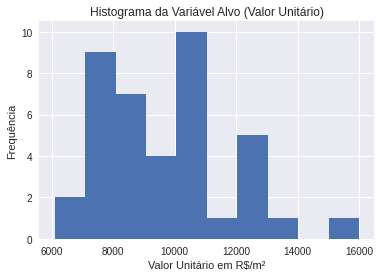

In [6]:
plt.hist(y);
plt.title("Histograma da Variável Alvo (Valor Unitário)");
plt.xlabel("Valor Unitário em R$/m²");
plt.ylabel("Frequência");

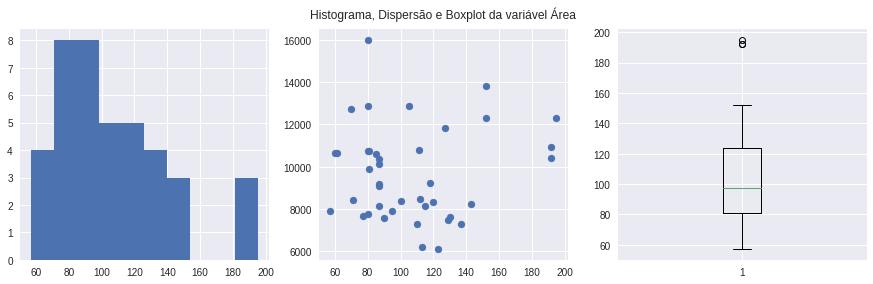

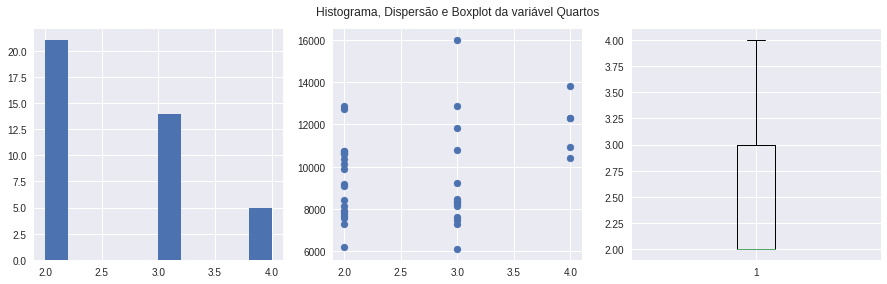

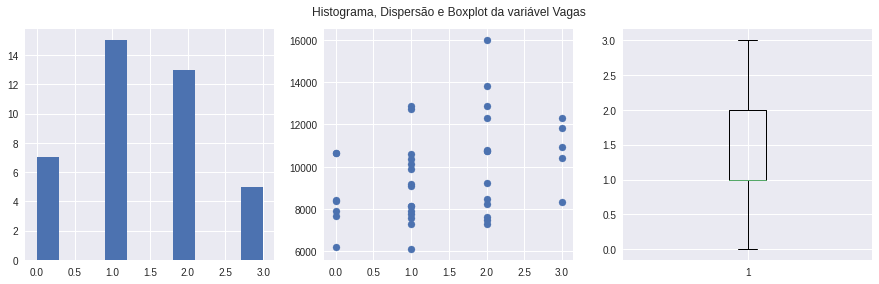

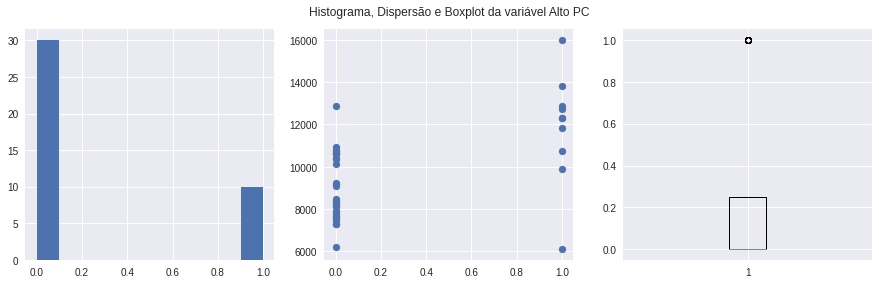

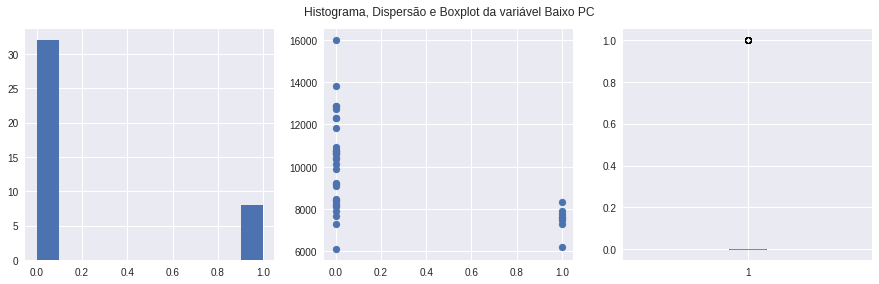

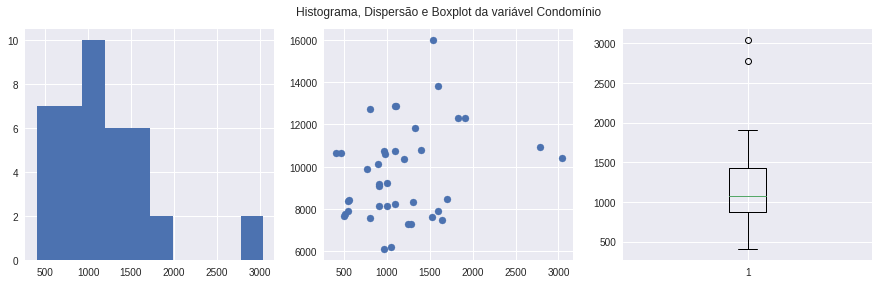

In [7]:
for i in range(k):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].hist(X[X.columns[i+1]])
    axs[1].scatter(X[X.columns[i+1]], y)
    axs[2].boxplot(X[X.columns[i+1]])
    
    fig.suptitle(f"Histograma, Dispersão e Boxplot da variável {X.columns[i+1]}")

    fig.subplots_adjust(left=.01, right=.99, bottom=.1, top=.9,
                        wspace=.2, hspace=.4)

### Dados do Imóvel Avaliando

In [8]:
aval = [1, 100, 3, 2, 0, 0, 1340]

### Modelo de Regressão Linear Múltipla Não Regularizado

In [9]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     10.91
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           1.11e-06
Time:                        19:33:04   Log-Likelihood:                -342.59
No. Observations:                  40   AIC:                             699.2
Df Residuals:                      33   BIC:                             711.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9293.4628    950.956      9.773      0.000    7358.728    1.12e+04
Área         -69.3888     17.207     -4.033      0.000    -104.397     -34.380
Quartos     1741.2516    752.641      2.314      0.027     209.992    3272.511
Vagas        695.3719    418.640      1.661      0.106    -156.358    1547.102
Alto PC     1720.5988    616.493      2.791      0.009     466.335    2974.863
Baixo PC   -1689.2336    599.272     -2.819      0.008   -2908.462    -470.005
Condomínio     1.8602      0.838      2.219      0.033       0.155       3.566
==============================================================================
Omnibus:                        7.778   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.819
Skew:                          -0.636   Prob(JB):                       0.0200
Kurtosis:                       4.753   Cond. No.                     6.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
aval_VU = sum(results.params*aval)
aval_VT = aval_VU * aval[1]
print(f"O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla não Regularizado é de R$ {aval_VT:.2f}.")

O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla não Regularizado é de R$ 1146177.03.


### Modelo de Regressão Linear Múltipla Regularizado (α = 10 para todas as variáveis explicativas)

In [11]:
model = sm.OLS(y, X)

results_reg = model.fit_regularized(method='elastic_net', alpha=10.0, L1_wt=1.0,
                                start_params=None, profile_scale=False, refit=False)
results_reg.params

const         8643.092188
Área           -38.136472
Quartos       1169.474306
Vagas          659.122246
Alto PC       1763.628702
Baixo PC     -1731.667945
Condomínio       0.870974
dtype: float64

In [12]:
aval_VU = np.dot(aval, results_reg.params)
aval_VT = aval_VU * aval[1]
print(f"O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla Regularizado por α=10 é de R$ {aval_VT:.2f}.")

O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla Regularizado por α=10 é de R$ 1082321.81.


In [13]:
SSE = np.sum((np.dot(X, results_reg.params) - y).pow(2))
SST = np.sum((np.mean(y) - y).pow(2))
R2 = 1 - SSE/SST
R2

0.6237098465729364

In [14]:
R2_Aj = 1 - (1 - R2)*((n - 1)/(n - k - 1))
R2_Aj

0.5552934550407429

### Modelo de Regressão Linear Múltipla Regularizado (α proporcional ao P(t) de cada variável)

In [15]:
alpha = [0, 0, 10, 30, 0, 0, 10]

In [16]:
model = sm.OLS(y, X)

results_reg = model.fit_regularized(method='elastic_net', alpha=alpha, L1_wt=1.0,
                                start_params=None, profile_scale=False, refit=False)
results_reg.params

const         8801.898697
Área           -38.899948
Quartos       1115.493518
Vagas          599.961575
Alto PC       1852.828842
Baixo PC     -1782.580705
Condomínio       0.992578
dtype: float64

In [17]:
aval_VU = np.dot(aval, results_reg.params)
aval_VT = aval_VU * aval[1]
print(f"O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla Regularizado pelo vetor α é de R$ {aval_VT:.2f}.")

O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla Regularizado pelo vetor α é de R$ 1078836.24.


In [18]:
SSE = np.sum((np.dot(X, results_reg.params) - y).pow(2))
SST = np.sum((np.mean(y) - y).pow(2))
R2 = 1 - SSE/SST
R2

0.6284833473929141

In [19]:
R2_Aj = 1 - (1 - R2)*((n - 1)/(n - k - 1))
R2_Aj

0.5609348651007167

### Análise dos Modelos

#### Para y = x0 + β1x1 + ...
    OLS com todas as variáveis
        Av = 1146177.03 reais
        R² = 0.665
        Aj = 0.604

    OLS reg (α = 10) com todas as variáveis
        Av = 1082321.81 reais
        R² = 0.624
        Aj = 0.555

    OLS reg (vetor α) com todas as variáveis
        Av = 1078836.24 reais
        R² = 0.628
        Aj = 0.561